# Clean and Analyze Employee Exit Surveys 

We have two datasets - surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. Both datasets contains information about employees and their removal. 

We need find the answers on the next questions:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

- Are younger employees resigning due to some kind of dissatisfaction? What about older employees? 

- In which organization is the dissatisfaction higher?

In [2]:
#import Pandas and NumPy libraries

import numpy as np
import pandas as pd

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')


Our first two steps is a review datasets. We check the information abou datasets, find a set of reasons about separartions and check the columns for the presence of null values.
After that we will be able to identify tyhe charecteristic features of the dataset and decide what we need to clean.

### Review DETE Survey

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [4]:
dete_survey.head(5)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
dete_survey['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [6]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

### Review TAFE Survey

In [7]:
#review tafe_survey dataset

tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [8]:
tafe_survey.head(5)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [9]:
tafe_survey['Reason for ceasing employment'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

In [10]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

***First Observations*** 

- Both Dataframes have a big number of columns, part of them designate the same things.
- Both Dataframes have a null data.
- Some columns from both data don't need for research.
- Some of null data haven't a 'NaN' designation.
- Name of columns are very long in tafe_survey and difficult for reading.
- DETE dataset have a bool type of data on enphasizing 'close' questions. TAFE dataset mostly consists of string variables.
- The ID field of TAFE is composed of a float type variable.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

### Drop unnecessary columns and data

Lets refresh the NaN-values and data we don't need and redefine datasets focusing on our observations.

In [11]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

In [12]:
#drop the unnessesary columns from DETE data

dete_survey_updated = dete_survey.drop(axis=1, columns = dete_survey.columns[28:49])

In [13]:
#drop the unnessesary columns from DETE data

tafe_survey_updated = tafe_survey.drop(axis = 1, columns = tafe_survey.columns[17:66])

We reduced some data columns, which we didn't need for simplify our labour and change the type of 'Not Started' data on NaN-type for next activity. 

Next we need to rename column's names.

In [14]:
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.replace(' ','_').str.lower()
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [15]:
tafe_survey_updated = tafe_survey_updated.rename({'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype',
           'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
           'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position',
           'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
           'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service' }, axis=1)

tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


We reduce number of columns (From 56 to 35 for DETE, from 72 to 23 for TAFE) and also have clearly read and clearly track the columns name.

### Select the Resignations causes

Next step is selection only the 'resignation' causes of separation type in according our goals. 

In [16]:
#check the status of separation type in DETE dataset

dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [17]:
#check the status of separation type in TAFE dataset

tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [18]:
#create two new dataframe that only have 'resignation' as separation type

dete_resignations = dete_survey_updated.copy()[dete_survey_updated['separationtype'].str.contains(r"[Rr]esignation")]
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    object 
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

In [19]:
tafe_resignations = tafe_survey_updated.copy()[tafe_survey_updated['separationtype'] == 'Resignation']

tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

We recieved 311 rows from DETE survey and 340 entries from TAFE survey. 

Before we will start to answer on our questions, we need to urge about adequacy and reliabilty of completed values. We'll focus on verifying that the years in the ***cease_date*** and ***dete_start_date*** columns make sense. 

Like ***date_stat_date*** cannot start after last year of work and ***dete_start_date*** have no reason to start before the year 1940.

Lets check. 


### Check the dates of working

In [20]:
#observe values of dates columns in DETE dataset 

dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
07/2006      1
09/2010      1
2010         1
Name: cease_date, dtype: int64

In [21]:
pattern = r"([1-2][0-9]{3})"
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(pattern, expand = False).astype(float)
dete_resignations['cease_date'].value_counts().sort_index(ascending = False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [22]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending = False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

Literally, DETE resignations and DETE starting work data looks thorough and consistent. 
Most of all resignations appears between 2013 and 2014 years. Most of all starting work date appears in interval between 2004 and 2012 years.

In [23]:
#checking the TAFE resignations

tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

Create a boxplots to visualize our date columns.

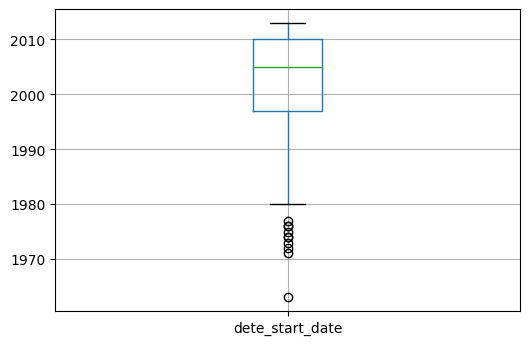

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

dete_resignations.boxplot(column=['dete_start_date'])

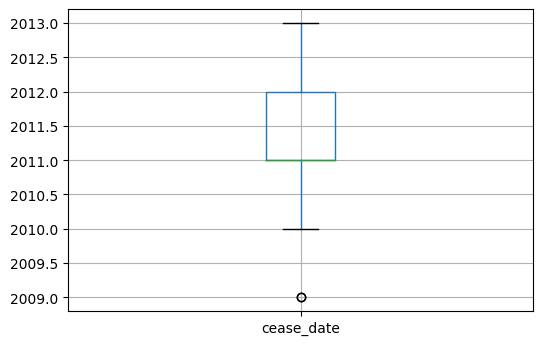

In [25]:
tafe_resignations.boxplot(column=['cease_date'])

Then we need to find years of service period. As we can see TAFE alreasdy have this columns. Another way the data from DETE doesnt' have this column. 

Lets start to find and create a new column with name which will be equal ***institute_service*** from TAFE data.

In [26]:
#create institute_service data for DETE resignations.

dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


Eventually, we can start to find employyes who resigned because they were dissatisfied.

### Identify Dissatisfied Employees

#### TAFE Dissatisfied

In [27]:
tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

We need to explore only the dissatisfaction factor. It's a Dissatisfaction and Job Dissatisfaction in TAFE columns.

In [28]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [29]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [30]:
#create a function which sort meanings in every cell on True, False and NaN

def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [31]:
#use df.any method cause we have a bool values in the columns and we can combined it in new 'dissatisfied' column.create a new column named @dissatisfied

tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

In [32]:
#check the values into new column

tafe_resignations['dissatisfied'].value_counts(dropna = False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

**True** indicates a personn resigned because they were dissatisfied with the job;

**False** indicates a person resigned because of a reason other than dissatisfaction with the job

We can notice that dissatisfaction in TAFE equals **91 employees**, which marked this point in a survey.

#### DETE dissatisfied

In [33]:
#rewiew the DETE columns on values.

dete_resignations['job_dissatisfaction'].value_counts(dropna=False)

False    270
True      41
Name: job_dissatisfaction, dtype: int64

In [34]:
#create a new column named @dissatisfied

dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
                                                    'dissatisfaction_with_the_department',
                                                    'physical_work_environment',
                                                    'lack_of_recognition',
                                                    'lack_of_job_security',
                                                    'work_location',
                                                    'employment_conditions',
                                                    'work_life_balance',
                                                    'workload']].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

We can see that **149 DETE employees** resigned because they was dissatisfied.

### Combine the data

Now we can combined two datasets. We will aggregate the data according to the ***insitute_service*** column.

Firstly, we need to add column to eaxch dataframe which will allow us to easily distinguish between two.

In [35]:
#create new columns

dete_resignations_up['institute'] = 'DETE'

dete_resignations_up.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False,DETE
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,DETE
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True,DETE
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE


In [36]:
tafe_resignations_up['institute'] = 'TAFE'

tafe_resignations_up.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied,institute
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False,TAFE
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False,TAFE
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE


In [37]:
#combine two dataframes and create new dataset

combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)

combined.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.0,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#drop columns with less then 500 non null values

combined_updated = combined.dropna(thresh = 500, axis=1)
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(2), object(8)
memory usage: 51.0+ KB


In [39]:
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


We combined two dataframes and delete columns with redundant or empty information. The results is now a single dataframe with 10 columns and 651 entries.

Now we can easy to detect the patterns and the dependencies between columns, which can reveal the real picture of separations. 

### Clean the Service Column and create the categories

Next step in cleaning columns in our result, which we will use in analysis. As you can notice ***institure_service*** column have a different style of values.

In [40]:
combined_updated['institute_service'].value_counts().head(10)

Less than 1 year    73
1-2                 64
3-4                 63
5-6                 33
11-20               26
5.0                 23
1.0                 22
7-10                21
3.0                 20
0.0                 20
Name: institute_service, dtype: int64

For analysis we can divide different meaning of service on some distinctive categories.

*This is a suggested variety:*

*New:* Less than 3 years at a company

*Experienced:* 3-6 years at a company

*Established:* 7-10 years at a company

*Veteran:*11 or more years at a company

In [41]:
#create a copy to avoid setting with copy warning

combined_updated = combined_updated.copy()

In [42]:
#turning different format to numbers
 
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str).str.extract(r'(\d+)').astype(float) 

combined_updated['institute_service'].value_counts().head(10)

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
Name: institute_service, dtype: int64

In [43]:
#wright a function to define categories

def career_stage(val):
    if pd.isnull(val):
        return np.nan;
    elif val < 3:
        return 'New'
    elif val >= 3 and val < 7:
        return 'Experienced'
    elif val >= 7 and val < 10:
        return 'Established'
    else:
        return 'Veteran'
        
combined_updated['service_cat'] = combined_updated['institute_service'].apply(career_stage)
combined_updated.head(10)

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE,Established
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE,Veteran
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE,Experienced
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE,Veteran
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE,Experienced
5,13.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,14.0,False,DETE,Veteran
6,15.0,Resignation-Other employer,2012.0,Teacher,Permanent Full-time,Male,31-35,5.0,True,DETE,Experienced
7,17.0,Resignation-Other reasons,2012.0,Teacher Aide,Permanent Part-time,Male,61 or older,NaN,True,DETE,NaN
8,21.0,Resignation-Other employer,2012.0,Teacher,Permanent Full-time,Male,56-60,30.0,False,DETE,Veteran
9,22.0,Resignation-Other reasons,2012.0,Cleaner,Permanent Part-time,Female,51-55,32.0,False,DETE,Veteran


In [44]:
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        142
NaN             88
Established     56
Name: service_cat, dtype: int64

Obviously, that employees according this calibration resigned mostly during first term of career or after many years spending in institute. 

Next we will analyze dependency between dissatisfying and years of service. 


### Analyze dependency between dissatisfying and years of service

Lets find the answer on out main questions - is the age affect on dissatisfying. We have a two columns - **dissatisfied** and **service_cat**. Due to them we can make a plot, which vizualize dependency.

In [45]:
 combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [46]:
#replacing missing values with False

combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)
combined.reset_index(drop=True, inplace=True)
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [47]:
#create the pivot table

combined_updated.pivot_table('dissatisfied', 'service_cat')

,dissatisfied
service_cat,
Established,0.553571
Experienced,0.343023
New,0.295337
Veteran,0.471831


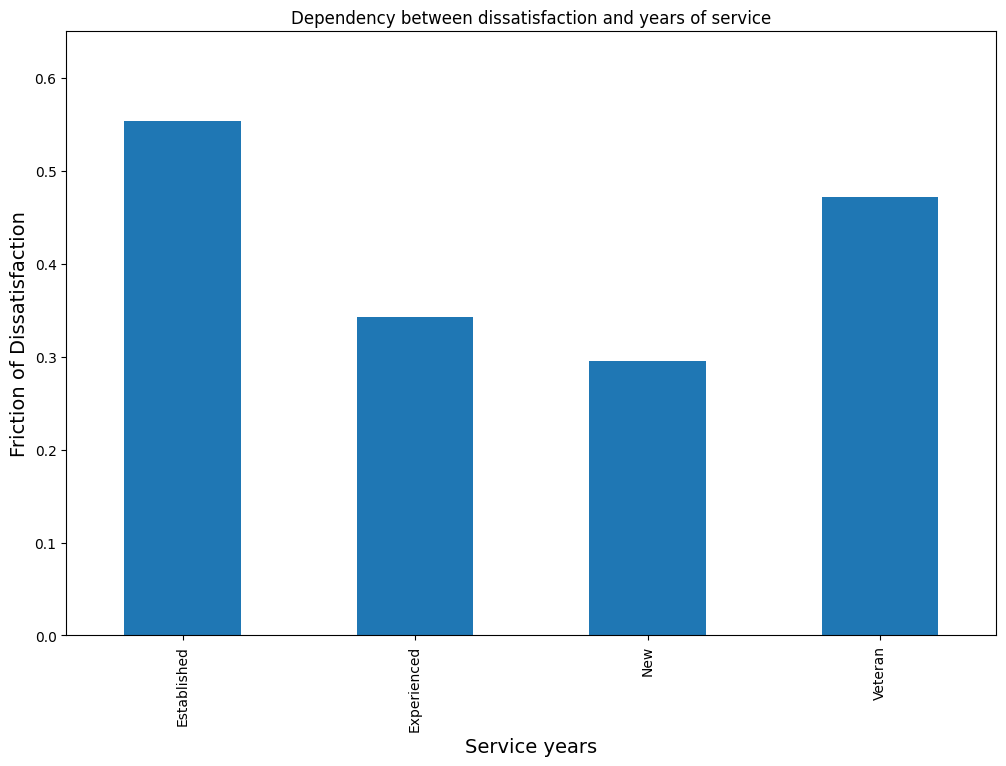

In [48]:
#create the plot

%matplotlib inline
combined_updated.pivot_table('dissatisfied', 'service_cat').plot(kind='bar', figsize=(12, 8), ylim=(0,0.65), title = 'Dependency between dissatisfaction and years of service', legend =False)
plt.ylabel("Friction of Dissatisfaction", size=14)
plt.xlabel("Service years", size=14)
plt.show()



Recall out first question: 
    
Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

As we can see dissatisfaction is a problem for most established workers. Nearby 50 procent among all resigned employees worked in institute for many years.
As a suggestion, we can grasp that cause by two type of problems, at least.
Firstly, established employees didn't had an advantages, growth or another career's ways. 
Secondly, established employees known just more about institute, than old workers, and accumulate dissatisfaction from many different reasons which they had encountered.

### Analyze organazation 

Also we can find dissatisfation in comparing of organization. We have  clean data and used order of actions.

Text(0.5, 1.0, 'Dissatisfaction by Organization')

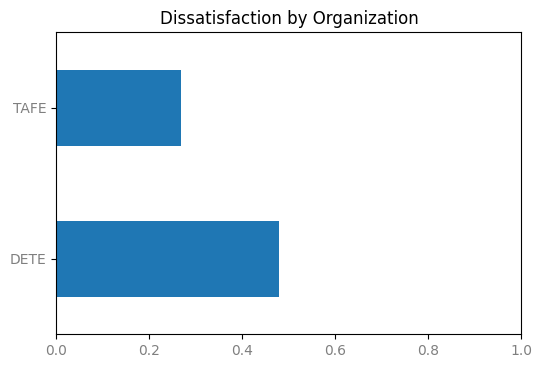

In [49]:
## create a pivot table for the two institutions

diss_org = combined_updated.pivot_table(values='dissatisfied',index='institute')

## plotting the results

diss_org.plot(kind='barh',legend=None)
plt.xlim(0,1)
plt.ylabel('')
plt.xticks(alpha=0.5)
plt.yticks(alpha=0.5)
plt.title('Dissatisfaction by Organization')

As we can see dissatisfaction is a most common reason for cease in DETE organization.

### Analyze age factor

Age is one of related factor for a possible reasons of dissatisfying. Lets check our situation. 

The procedure is similar to the analysis of experience.

In [50]:
#review the age column

combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
31  35           32
36  40           32
21-25            29
31-35            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [51]:
#extracting the value

combined_updated['age'] = combined_updated['age'].astype(str).str.extract(r'(\d+)').astype(float)

combined_updated['age'].value_counts(dropna=False)

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
NaN     55
56.0    55
61.0    23
20.0    10
Name: age, dtype: int64

In [52]:
#change the NaN values one the mean

combined_updated['age'].fillna(round(combined_updated['age'].mean()),inplace=True)
combined_updated['age'].value_counts()

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
39.0    55
56.0    55
61.0    23
20.0    10
Name: age, dtype: int64

In [53]:
#create a gradation and express it by the function

def aging(value):
    if value <= 30:
        return 'Young'
    elif value > 30 and value <= 40:
        return 'Active middle age'
    elif value > 40 and value <= 50:
        return 'Post middle age '
    else:
        return 'Old'

In [54]:
#using the function

combined_updated['age_cat'] = combined_updated['age'].apply(aging)
combined_updated.head(5)

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat,age_cat
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36.0,7.0,False,DETE,Established,Active middle age
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41.0,18.0,True,DETE,Veteran,Post middle age
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31.0,3.0,False,DETE,Experienced,Active middle age
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46.0,15.0,True,DETE,Veteran,Post middle age
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31.0,3.0,False,DETE,Experienced,Active middle age


In [56]:
#create the pivot table

combined_updated.pivot_table(values='dissatisfied',index='age_cat')

,dissatisfied
age_cat,
Active middle age,0.328042
Old,0.422819
Post middle age,0.379310
Young,0.352518


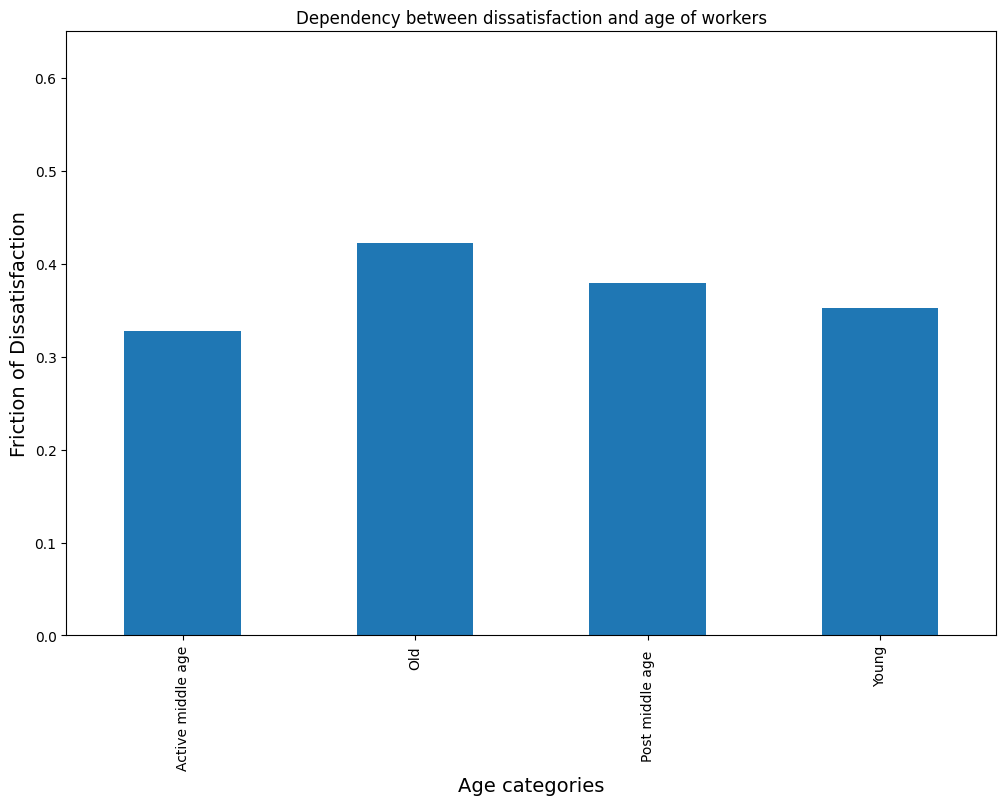

In [57]:
#create the plot

combined_updated.pivot_table('dissatisfied', 'age_cat').plot(kind='bar', figsize=(12, 8), ylim=(0,0.65), title = 'Dependency between dissatisfaction and age of workers', legend =False)
plt.ylabel("Friction of Dissatisfaction", size=14)
plt.xlabel("Age categories", size=14)
plt.show()